# PCA执行的一般过程
- 在各维度上对原始样本进行标准化，即通过线性变换，使得样本在各维度上的均值变为0
- 计算原始各维度的协方差矩阵$C = \frac{1}{n} XX^T$
- 计算协方差矩阵的特征值和特征向量
- 将特征值从大到小排序，取最大的m个特征向量组成样本线性映射矩阵$\hat{U}$
- 得到降维后的样本向量矩阵$Y = U^TX$

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

### 导入手写数字数据集

In [2]:
digits = load_digits()
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=666666)

In [3]:
x_train.shape

(1437, 64)

In [4]:
x_test.shape

(360, 64)

### 计算均值向量

In [5]:
mean_vector = x_train.mean(axis=0)
mean_vector

array([0.00000000e+00, 3.02018093e-01, 5.22268615e+00, 1.18622129e+01,
       1.18503827e+01, 5.83855254e+00, 1.32915797e+00, 1.30132220e-01,
       5.56715379e-03, 2.02435630e+00, 1.04551148e+01, 1.19533751e+01,
       1.02289492e+01, 8.27070285e+00, 1.82393876e+00, 1.12038970e-01,
       3.47947112e-03, 2.61238692e+00, 9.97355602e+00, 6.93319415e+00,
       7.05775922e+00, 7.82950592e+00, 1.77244259e+00, 5.49756437e-02,
       1.39178845e-03, 2.40988170e+00, 9.06332637e+00, 8.79540710e+00,
       9.97425191e+00, 7.60194850e+00, 2.31941545e+00, 2.78357690e-03,
       0.00000000e+00, 2.28601253e+00, 7.57550452e+00, 9.09672930e+00,
       1.02853166e+01, 8.72651357e+00, 2.92136395e+00, 0.00000000e+00,
       6.26304802e-03, 1.53235908e+00, 6.80375783e+00, 7.11482255e+00,
       7.65692415e+00, 8.21085595e+00, 3.46485734e+00, 2.92275574e-02,
       8.35073069e-03, 6.94502436e-01, 7.53235908e+00, 9.54210160e+00,
       9.41196938e+00, 8.75782881e+00, 3.78218511e+00, 2.12943633e-01,
      

### 计算协方差矩阵

In [6]:
cov_matrix = np.cov(x_train.T)
cov_matrix.shape

(64, 64)

### 计算协方差矩阵的特征值和特征向量

In [7]:
eig_value, eig_vector = np.linalg.eig(cov_matrix)
print(eig_value.shape) # 特征值
print(eig_vector.shape) #特征向量

(64,)
(64, 64)


### 将特征值从大到小排序，取最大的m个特征向量组成样本线性映射矩阵$\hat{U}$

In [8]:
#每个主成分所解释的方差
explained_variance_ratio = eig_value / eig_value.sum()
for i in explained_variance_ratio:
    print("{:.4f}".format(i))

0.1470
0.1368
0.1172
0.0841
0.0584
0.0492
0.0439
0.0358
0.0334
0.0304
0.0243
0.0230
0.0186
0.0178
0.0147
0.0142
0.0133
0.0125
0.0101
0.0091
0.0092
0.0079
0.0078
0.0072
0.0071
0.0059
0.0057
0.0052
0.0049
0.0043
0.0038
0.0035
0.0034
0.0034
0.0031
0.0029
0.0026
0.0023
0.0022
0.0021
0.0019
0.0016
0.0015
0.0014
0.0012
0.0011
0.0010
0.0007
0.0004
0.0006
0.0002
0.0001
0.0001
0.0001
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000
0.0000


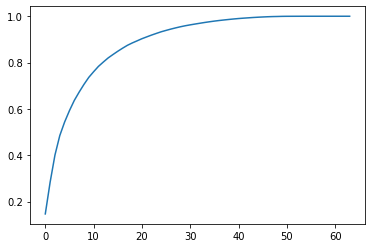

In [9]:
#可解释的方差
plt.plot(np.cumsum(explained_variance_ratio))
plt.show()

In [10]:
np.cumsum(explained_variance_ratio)

array([0.14699144, 0.28380225, 0.40099137, 0.48505456, 0.54350381,
       0.59267818, 0.63660046, 0.67242823, 0.70580513, 0.73617942,
       0.76051425, 0.78354841, 0.80213259, 0.81993513, 0.83466734,
       0.84885416, 0.86211983, 0.87459605, 0.88473698, 0.89383172,
       0.90303477, 0.91096567, 0.91880326, 0.9260155 , 0.93306626,
       0.93893606, 0.94464853, 0.94986235, 0.95475749, 0.95907168,
       0.96285244, 0.96637052, 0.96976863, 0.97313254, 0.97618553,
       0.97906937, 0.98162004, 0.98395163, 0.98614344, 0.98821973,
       0.99011085, 0.99168596, 0.99314457, 0.99457301, 0.99577164,
       0.99683849, 0.99779907, 0.99852669, 0.99895289, 0.99951963,
       0.99974557, 0.99982345, 0.99988397, 0.99994122, 0.99997959,
       0.99998731, 0.99999418, 0.99999766, 0.99999807, 0.99999874,
       1.        , 1.        , 1.        , 1.        ])

### 假设我们要降维到2维，即m=2

In [11]:
top_2_eig_vector = eig_vector[:,:2].T
top_2_eig_vector.shape

(2, 64)

### 得到降维后的样本向量矩阵$Y = U^TX$

In [12]:
(x_train - mean_vector).dot(top_2_eig_vector.T).shape

(1437, 2)

In [13]:
x_train_2 = (x_train - mean_vector).dot(top_2_eig_vector.T)
x_train_2[0]

array([17.68874067,  5.30328847])

### 测试

In [14]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_pca2 = pca.transform(x_train)
x_train_pca2[0]

array([17.68874044,  5.30328883])